## Dacon - 퇴근시간 버스 승차 인원 예측 중급코드
## (Jeju Island Bus Passengers Estimation in Leaving work time)

### 목적 
- **<U> 18시부터 20시까지의 버스 승차인원</U> 구하기 **   

### 데이터 설명
#### train, test  공통 사항
- 해당 데이터에는 버스카드를 통해 결제를 한 경우에 대한 정류소 승, 하차 데이터로 모든 승차정보의 경우는 기록이 되어있지만,
- 버스에서 하차를 할 때, 버스카드를 찍지 않는 경우, 해당 기록이 비어 있는 상태입니다. 따라서, 승차 인원수와 하차 인원수가 동일하지 않고 다소 차이가 있음을 미리 알려드립니다.

#### train, test csv 공통사항
- 해당 버스정류장에 대한 각각의 위도, 경도가 제공이 되어있는 상태로 같은 정류장 이름이지만 위도와 경도가 서로 다른 경우가 존재합니다. 
- 해당 경우는, 같은 정류장 이름을 가지고 있는 길 건너편의 정류장에 해당이 됩니다.

#### train.csv and test.csv
- train.csv 의 경우, <U>**2019년 9월 제주도의 각 날짜, 출근시간 (6시~12시)의 버스 정류장별 승하차 인원**</U>,  <U>**퇴근시간(18시~20시)의 버스 정류장별 승차 인원**</U>이 기록되어 있습니다.
- test.csv의 경우, <U>**2019년 10월의 각 날짜, 출근시간(오전 6시~12시)의 버스 정류장별 승하차 인원**</U>이 기록되어  있음.

#### submission_제출양식.csv 
- submission_제출양식의 경우, test data의 ID와 목표변수인 18시~20시 승차 인원로만 이루어져 있습니다.
- 참가자분들께서는 test.csv에서 ID와 예측값을 결합하여, 해당 submission_제출양식.csv 파일형식 처럼 만든 이후,
- 해당 제출 파일 양식 그대로(변수명 포함된 상태) 제출을 해주시면 됩니다

### 변수 설명
- id(고유번호=인덱스), date(날짜), bus_route_id(버스경로 id)
- in_out(시내버스, 시외버스), station_code(정거장 번호 id)
- station_name(정거장 이름), latitude(위도), longitude(경도)
- 6-7_ride, 7-8_ride, 9-10_ride, 10-11_ride, 11-12_ride (오전시간 탑승인원)
- 6-7_takeoff, 7-8_takeoff, 9-10_takeoff, 10-11_takeoff, 11-12_takeoff (오전시간 하차 인원)
- 18-20_ride (퇴근시간 탑승인원)

In [141]:
import os
os.chdir("C:\\Users\\urse\\Desktop\\dataset\\Dacon-BusJeju")
         
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print('데이터 로드 완료')

데이터 로드 완료


In [142]:
# 훈련 데이터 확인
print(train.shape)
train.head()

(415423, 21)


,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [143]:
# 테스트 데이터 확인
print(test.shape)
test.head()
# => test_data는 18-20 ride 항목이 없다.

(228170, 20)


,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [144]:
# 1. 데이터 탐색 - (1) dtypes
print('#### train_dtypes\n', train.dtypes)
print('#### test_dtypes\n', test.dtypes)
# -> train data와 test data의 데이터 형식은 일치
# -> date 변수 datetime 변수형으로 변환 필요

#### train_dtypes
 id                 int64
date              object
bus_route_id       int64
in_out            object
station_code       int64
station_name      object
latitude         float64
longitude        float64
6~7_ride         float64
7~8_ride         float64
8~9_ride         float64
9~10_ride        float64
10~11_ride       float64
11~12_ride       float64
6~7_takeoff      float64
7~8_takeoff      float64
8~9_takeoff      float64
9~10_takeoff     float64
10~11_takeoff    float64
11~12_takeoff    float64
18~20_ride       float64
dtype: object
#### test_dtypes
 id                 int64
date              object
bus_route_id       int64
in_out            object
station_code       int64
station_name      object
latitude         float64
longitude        float64
6~7_ride         float64
7~8_ride         float64
8~9_ride         float64
9~10_ride        float64
10~11_ride       float64
11~12_ride       float64
6~7_takeoff      float64
7~8_takeoff      float64
8~9_takeoff      float64

In [145]:
# 1. 데이터탐색 - (2) object형 unique (범주형 변수들!)
print('### train data')
for i in train.columns:
    if train[i].dtypes=='object':
        print(i, train[i].unique(), len(train[i].unique()), '개')

print('\n### test data')
for i in test.columns:
    if test[i].dtypes=='object':
        print(i, test[i].unique(), len(test[i].unique()), '개')

# -> train_data는 9월 1일 ~ 9월 30일 / test_data는 10월 1일 ~ 10월 16일

### train data
date ['2019-09-01' '2019-09-02' '2019-09-03' '2019-09-04' '2019-09-05'
 '2019-09-06' '2019-09-07' '2019-09-08' '2019-09-09' '2019-09-10'
 '2019-09-11' '2019-09-12' '2019-09-13' '2019-09-14' '2019-09-15'
 '2019-09-16' '2019-09-17' '2019-09-18' '2019-09-19' '2019-09-20'
 '2019-09-21' '2019-09-22' '2019-09-23' '2019-09-24' '2019-09-25'
 '2019-09-26' '2019-09-27' '2019-09-28' '2019-09-29' '2019-09-30'] 30 개
in_out ['시외' '시내'] 2 개
station_name ['제주썬호텔' '한라병원' '정존마을' ... '조천체육관(종점)' '대서리' '행원교차로'] 1961 개

### test data
date ['2019-10-01' '2019-10-02' '2019-10-03' '2019-10-04' '2019-10-05'
 '2019-10-06' '2019-10-07' '2019-10-08' '2019-10-09' '2019-10-10'
 '2019-10-11' '2019-10-12' '2019-10-13' '2019-10-14' '2019-10-15'
 '2019-10-16'] 16 개
in_out ['시외' '시내'] 2 개
station_name ['제주썬호텔' '한라병원' '정존마을' ... '오라1동복지회관' '위미리(위미2리교차로)' '꿈에그린아파트'] 1954 개


In [146]:
# 1. 데이터 탐색 - (3) in_out 값별 갯수
train_in_out_count = train['in_out'].value_counts()
test_in_out_count = test['in_out'].value_counts()

print('train_data\n', train_in_out_count)
print('\ntest_data\n', test_in_out_count)

# -> 후에 시외를 '1'로 시내를 '0'으로 변환 필요

train_data
 시내    408500
시외      6923
Name: in_out, dtype: int64

test_data
 시내    224439
시외      3731
Name: in_out, dtype: int64


### 데이터 탐색으로 알게된 결과
- (0) train data와 test data의 데이터 형식은 일치하지만 test_data에 18-20_ride 가 없음. (예측해야되는 값)
- (0) train_data는 9월 1일 ~ 9월 30일 / test_data는 10월 1일 ~ 10월 16일
- (1) date 변수 datetime 변수형으로 변환 필요
- (2) 시내와 시외도 원 핫  인코딩으로 변환 필요
- (3) 예측하려고 하는 시간은 2시간에 해당되는 승차인원 예측. 따라서 승 하차 인원들도 2시간 간격으로 통합 필요


In [147]:
# 2. 데이터전처리 - (1) date 변수 변환 및 요일 항목 생성 (train data)
# datetime 형식 변환
train['date'] = pd.to_datetime(train['date'])

# date 항목으로부터 으로부터 요일을 뽑아낸 후 data frame에 원 핫 인코딩으로 추가
train['weekday'] = train['date'].dt.weekday # 0 ~ 6 (Monday is 0 and Sunday is 6)
train = pd.get_dummies(train, columns=['weekday'])

train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_takeoff,11~12_takeoff,18~20_ride,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,5.0,0,0,0,0,0,0,1
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,53.0,0,0,0,0,0,0,1
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1


In [148]:
# 2. 데이터전처리 - (1) date 변수 변환 및 요일 항목 생성 (test data)
test['date'] = pd.to_datetime(test['date'])

# date 항목으로부터 으로부터 요일을 뽑아낸 후 data frame에 원 핫 인코딩으로 추가
test['weekday'] = test['date'].dt.weekday # 0 ~ 6 (Monday is 0 and Sunday is 6)
test = pd.get_dummies(test, columns=['weekday'])

test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_takeoff,10~11_takeoff,11~12_takeoff,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,...,0.0,0.0,1.0,0,1,0,0,0,0,0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,...,1.0,0.0,0.0,0,1,0,0,0,0,0


In [149]:
### 2. 데이터 전처리 - (2) in_out 변수 변환 -> map함수 이용 및, 시내 - 시외 변환
train['in_out'] = train['in_out'].map({'시내':0,'시외':1})
test['in_out'] = test['in_out'].map({'시내':0,'시외':1})
print('in_out 변수 변환 완료')

in_out 변수 변환 완료


In [150]:
### 2. 데이터 전처리 - (3) 승차, 하차 시간대 통합 작업
train['6-8a']=train['6~7_ride']+train['7~8_ride'] # 6 ~ 8시 승차인원
train['8-10a']=train['8~9_ride']+train['9~10_ride'] # 8 ~ 10시 승차인원
train['10-12a']=train['10~11_ride']+train['11~12_ride'] # 10 ~ 12시 승차 인원

train['6-8b']=train['6~7_takeoff']+train['7~8_takeoff'] # 6 ~ 8시 하차인원
train['8-10b']=train['8~9_takeoff']+train['9~10_takeoff'] # 8 ~ 10시 하차인원
train['10-12b']=train['10~11_takeoff']+train['11~12_takeoff'] # 10시 ~ 12시 하차인원
print('승하차 시간 2시간으로 통합 완료-train_data')

승하차 시간 2시간으로 통합 완료-train_data


In [151]:
### 2. 데이터 전처리 - (3) 승차, 하차 시간대 통합 작업 (test_data)
test['6-8a']=test['6~7_ride']+test['7~8_ride'] # 6 ~ 8시 승차인원
test['8-10a']=test['8~9_ride']+test['9~10_ride'] # 8 ~ 10시 승차인원
test['10-12a']=test['10~11_ride']+test['11~12_ride'] # 10 ~ 12시 승차 인원

test['6-8b']=test['6~7_takeoff']+test['7~8_takeoff'] # 6 ~ 8시 하차인원
test['8-10b']=test['8~9_takeoff']+test['9~10_takeoff'] # 8 ~ 10시 하차인원
test['10-12b']=test['10~11_takeoff']+test['11~12_takeoff'] # 10시 ~ 12시 하차인원
print('승하차 시간 2시간으로 통합 완료-test_data')

승하차 시간 2시간으로 통합 완료-test_data


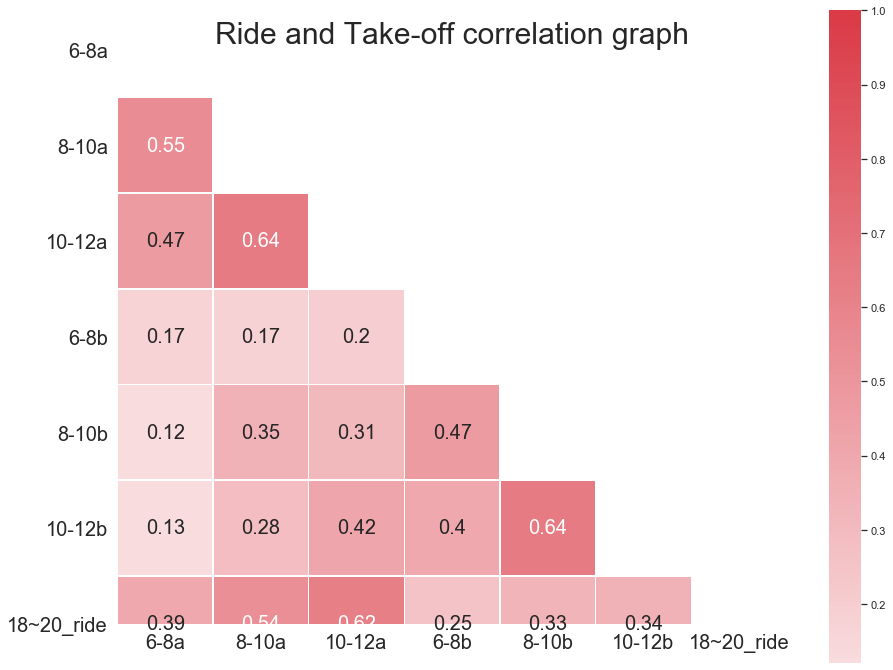

In [152]:
# 4. 데이터 시각화 - (1) 승 하차 시간대 시각화 (train_data)
import matplotlib.pyplot as plt # 시각화
import seaborn as sns #시각화
import numpy as np

visualize_train=train[['6-8a','8-10a','10-12a','6-8b','8-10b','10-12b','18~20_ride']]
cor=visualize_train.corr()

sns.set(style="white")
mask = np.zeros_like(cor,dtype=np.bool) # 단순 빈 배열 반환
mask[np.triu_indices_from(mask)]=True # 삼각형 모양의 시각화를 만드는것 (True=아래쪽삼각형 / False 위쪽삼각형)

f,ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(200,10,as_cmap=True)
#cmap = sns.color_palette("Blues")

#히트맵 생성
sns.heatmap(cor,
            mask=mask, # 표시하지 않을 마스크 부분을 지정 (위에서 지정해줌)
            cmap=cmap,
            center=0,
            square=True, 
            linewidths=0.5, # 경계면 실선으로 구분하기
            cbar_kws={"shrink":0.8}, # 컬러바 크기 
            # vmin = -1 ~ vmax=1 # 컬러바 범위 -1 ~ 1 
            annot=True, # 실제 값 표시
            annot_kws={"size": 20}
           ); 
plt.xticks(size=20) # x축 라벨 크기
plt.yticks(size=20,rotation=0) # y축 라벨 크기
plt.title("Ride and Take-off correlation graph",size=30);

# => 약한 상관관계 정도가 있음.

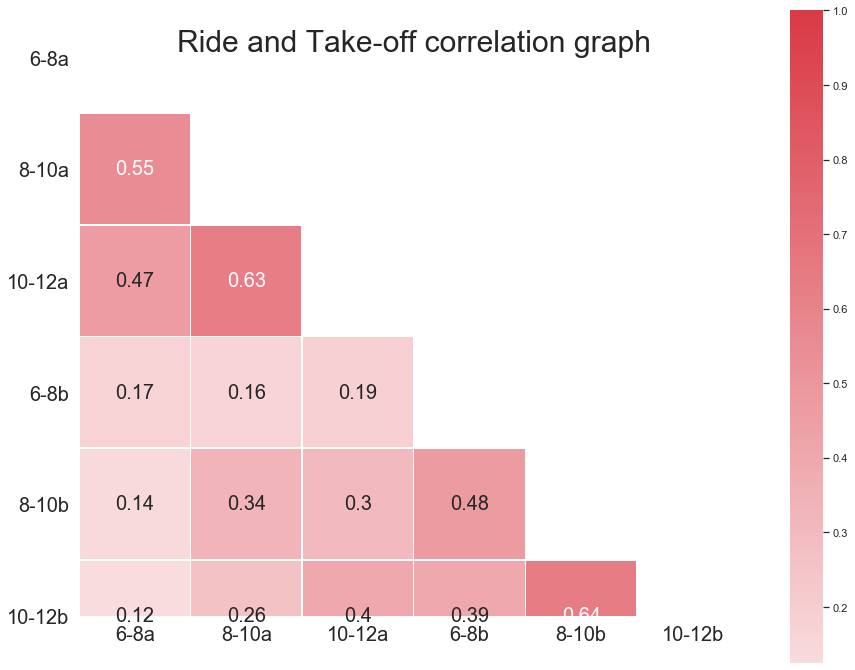

In [153]:
# 4. 데이터 시각화 - (2) 승 하차 시간대 시각화 (test_data)
visualize_test=test[['6-8a','8-10a','10-12a','6-8b','8-10b','10-12b']]
cor2=visualize_test.corr()

sns.set(style="white")
mask = np.zeros_like(cor2,dtype=np.bool) # 단순 빈 배열 반환
mask[np.triu_indices_from(mask)]=True # 삼각형 모양의 시각화를 만드는것 (True=아래쪽삼각형 / False 위쪽삼각형)

f,ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(200,10,as_cmap=True)
#cmap = sns.color_palette("Blues")

#히트맵 생성
sns.heatmap(cor2,
            mask=mask, # 표시하지 않을 마스크 부분을 지정 (위에서 지정해줌)
            cmap=cmap,
            center=0,
            square=True, 
            linewidths=0.5, # 경계면 실선으로 구분하기
            cbar_kws={"shrink":0.8}, # 컬러바 크기 
            # vmin = -1 ~ vmax=1 # 컬러바 범위 -1 ~ 1 
            annot=True, # 실제 값 표시
            annot_kws={"size": 20}
           ); 
plt.xticks(size=20) # x축 라벨 크기
plt.yticks(size=20,rotation=0) # y축 라벨 크기
plt.title("Ride and Take-off correlation graph",size=30);

# => 약한 상관관계 정도가 있음.

### 데이터 전처리 추가 아이디어
- 제주도의 인구는 서귀포시와 제주시에 몰려 있는 경우가 많아서 해당 지역과의 거리를 각각 feature로 추가할 수 있다.
- 해당 지역(제주시, 서귀포시) 및 서쪽 동쪽 지역의 위치를 활용하여, 해당 지역과의 거리를 각각 feature로 추가 
- 제주도에는 측정 구역 4개 있음

- dis_jeiusi (버스정류장과 제주측정소의 거리) / dis_seoquipo(버스정류장과 서귀포 측정소의 거리)
- dis_seongsan (버스정류장과 성산측정소의 거리) / dis_gosan (버스정류장과 고산 측정소의 거리)

- 제주 측정소의 위.경도 : 33.51411, 126.52969
- 고산 측정소의 위.경도 : 33.29382, 126.16283
- 성산 측정소의 위.경도 : 33.38677, 126.880
- 서귀포 측정소의 위.경도 : 33.24616, 126.5653

In [154]:
# 2. 데이터 전처리 - (3) 훈련 데이터 - 좌표 데이터를 이용한 Feature Engineering - 4개의 측정소와 버스정류장의 거리 추가

# 2개 좌표 간의 거리를 구하는 파이썬의 geopy 패키지
import geopy.distance
coords_jejusi = (33.51411, 126.52969) # 제주시 위경도
coords_seoquipo = (33.24616, 126.5653) # 서귀포시의 위경도
coords_gosan=(33.29382, 126.16283) #고산 측정소 근처
coords_seongsan=(33.38677, 126.880) #성산 측정소 근처

# 해당 버스정류장과 제주시와의 거리를 변수로 넣음
train1 = [geopy.distance.vincenty((train['latitude'].iloc[i], train['longitude'].iloc[i]), coords_jejusi).km for i in range(len(train))]
train2 = [geopy.distance.vincenty((train['latitude'].iloc[i], train['longitude'].iloc[i]), coords_seoquipo).km for i in range(len(train))]
train3 = [geopy.distance.vincenty((train['latitude'].iloc[i], train['longitude'].iloc[i]), coords_seongsan).km for i in range(len(train))]
train4 = [geopy.distance.vincenty((train['latitude'].iloc[i], train['longitude'].iloc[i]), coords_gosan).km for i in range(len(train))]

train['dis_jeju'] = train1
train['dis_seoquipo'] = train2
train['dis_seongsan'] = train3
train['dis_gosan'] = train4

print('해당 버스정류장과 제주, 고산, 서귀포, 성산과의 각각의 거리, 추가 완료 - 훈련데이터')

해당 버스정류장과 제주, 고산, 서귀포, 성산과의 각각의 거리, 추가 완료 - 훈련데이터


In [155]:
# 2. 데이터 전처리 - (4) 테스트 데이터 - 좌표 데이터를 이용한 Feature Engineering - 4개의 측정소와 버스정류장의 거리 추가
test1 = [geopy.distance.vincenty( (i,j), coords_jejusi).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
test2 = [geopy.distance.vincenty( (i,j), coords_seoquipo).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
test3 = [geopy.distance.vincenty( (i,j), coords_seongsan).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]
test4 = [geopy.distance.vincenty( (i,j), coords_gosan).km for i,j in list( zip( test['latitude'],test['longitude'] )) ]

test['dis_jeju']=test1
test['dis_seoquipo']=test2
test['dis_seongsan']=test3
test['dis_gosan']=test4

print('해당 버스정류장과 제주, 고산, 서귀포, 성산과의 각각의 거리, 추가 완료 - 테스트 데이터')

해당 버스정류장과 제주, 고산, 서귀포, 성산과의 각각의 거리, 추가 완료 - 테스트 데이터


In [156]:
# 4. 데이터 시각화 - (3) 제주도 측정소 위치 시각화

import folium # 지도 관련 시각화
from folium.plugins import MarkerCluster #지도 관련 시각화
import geopy.distance #거리 계산해주는 패키지 사용

#제주도 지역이 보일 수 있는 위치의 위도, 경도를 표시한 뒤, folium.Map에 변수로 넣고, map_osm에 할당
map_osm= folium.Map((33.399835, 126.506031),zoom_start=9) # 일반 제주도 중심 - train 용
map_osm2 = folium.Map((33.399835, 126.506031),zoom_start=9) # 일반 제주도 중심 - test 용
mc, mc2 = MarkerCluster() , MarkerCluster()# 마커 모음

mc.add_child( folium.Marker(location=coords_jejusi, popup='제주 측정소',icon=folium.Icon(color='red',icon='info-sign') ) ) #제주 측정소 마커 생성
map_osm.add_child(mc) #마커를 map_osm에 추가
mc2.add_child( folium.Marker(location=coords_jejusi, popup='제주 측정소',icon=folium.Icon(color='red',icon='info-sign') ) ) #제주 측정소 마커 생성
map_osm2.add_child(mc) #마커를 map_osm에 추가

mc.add_child( folium.Marker(location=coords_seoquipo, popup='서귀포 측정소',icon=folium.Icon(color='red',icon='info-sign') ) )
map_osm.add_child(mc)
mc2.add_child( folium.Marker(location=coords_seoquipo, popup='서귀포 측정소',icon=folium.Icon(color='red',icon='info-sign') ) )
map_osm2.add_child(mc2)

mc.add_child( folium.Marker(location=coords_gosan, popup='고산 측정소',icon=folium.Icon(color='red',icon='info-sign') ) )
map_osm.add_child(mc) 
mc2.add_child( folium.Marker(location=coords_gosan, popup='고산 측정소',icon=folium.Icon(color='red',icon='info-sign') ) )
map_osm2.add_child(mc2) 

mc.add_child( folium.Marker(location=coords_seongsan, popup='성산 측정소',icon=folium.Icon(color='red',icon='info-sign') ) )
map_osm.add_child(mc) 
mc2.add_child( folium.Marker(location=coords_seongsan, popup='성산 측정소',icon=folium.Icon(color='red',icon='info-sign') ) )
map_osm2.add_child(mc2) 

map_osm
# ==> 4개의 측정소 위치 가 구해짐

In [157]:
# 4. 데이터 시각화 - (4) 제주도 정류장 위치 시각화 (train)

#정류장의 위치만 확인하기 위해 groupby를 실행함
data=train[['latitude','longitude','station_name']].drop_duplicates(keep='first')

data2=data.groupby(['station_name'])['latitude','longitude'].mean()

# group_by하여 mean() 한 것을 저장(to_csv) 및 read_csv
data2.to_csv("folium_train.csv")
data2=pd.read_csv("folium_train.csv")

#정류장들의 대략적인 위치를 확인하기 위하여, folium map에 해당 정류장을 표시
for row in data2.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude,  row.longitude], popup=row.station_name)) #마커 생성
    map_osm.add_child(mc) #마커를 map_osm에 추가
    
map_osm
# => 각 측정소와 정류소의 위치를 알 수 있었음.

In [158]:
# 4. 데이터 시각화 - (5) 제주도 정류장 위치 시각화 (test)

#정류장의 위치만 확인하기 위해 groupby를 실행함
data_t=test[['latitude','longitude','station_name']].drop_duplicates(keep='first')

data_t1=data.groupby(['station_name'])['latitude','longitude'].mean()

# group_by하여 mean() 한 것을 저장(to_csv) 및 read_csv
data_t1.to_csv("folium_train.csv")
data_t1 = pd.read_csv("folium_train.csv")

#정류장들의 대략적인 위치를 확인하기 위하여, folium map에 해당 정류장을 표시
for row in data_t1.itertuples():
    mc2.add_child(folium.Marker(location=[row.latitude,  row.longitude], popup=row.station_name)) #마커 생성
    map_osm2.add_child(mc2) #마커를 map_osm에 추가
    
map_osm2
# => 각 측정소와 정류소의 위치를 알 수 있었음.

In [159]:
# 3. 데이터 분석 - (2) 각 측정소와 정류소의 거리를 계산한 다음, 
# 해당 정류소에서 가장 가까운 곳에 있는 측정소를 dist_name 변수의 값으로 넣음.
# 훈련 데이터
total = pd.DataFrame( list(zip( train1, train2, train3, train4)),columns=['dis_jeju','dis_seoquipo','dis_seongsan','dis_gosan'] )
train['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

# 테스트 데이터
total2 = pd.DataFrame( list(zip( test1, test2, test3, test4)), columns=['dis_jeju','dis_seoquipo','dis_seongsan','dis_gosan'] )
test['dist_name'] = total2.apply(lambda x: x.argmin(), axis=1)

# 중복값 제거
data3 = train[['station_name', 'latitude', 'longitude', 'dist_name']].drop_duplicates(keep='first') 
data4 = test[['station_name', 'latitude', 'longitude', 'dist_name']].drop_duplicates(keep='first')

from collections import Counter # count 용도
train_count = Counter(data3['dist_name'])
test_count = Counter(data4['dist_name'])

print(train_count)
print(test_count)
# => 전체 정류장이 어느 측정소와 가장 가까운지에 대한 값.

Counter({'dis_jeju': 1479, 'dis_seoquipo': 828, 'dis_gosan': 659, 'dis_seongsan': 597})
Counter({'dis_jeju': 1468, 'dis_seoquipo': 820, 'dis_gosan': 634, 'dis_seongsan': 583})


### 2. 데이터 전처리 - (5) 외부 실제 측정 데이터 활용 
- 외부 데이터 출처 - 제주도, 일자, 기온, 강수량
- 기간 : 2019.09.01 ~ 19.10.16 / 06~11시에 해당되는 사항들만 
- 데이터 출처 : https://data.kma.go.kr/cmmn/main.do 


In [160]:
# 2. 데이터 전처리 - (5) 외부 실제 측정 데이터 활용 
raining = pd.read_csv('Jeju_temperature_raining.csv', engine='python')

#외부데이터에서 나오는 지점명들을 변경
['dis_jeju','dis_seoquipo','dis_seongsan','dis_gosan']
raining['지점'] = [ str(i) for i in raining['지점'] ]

raining['지점'] = ['dis_jeju' if i=='184' else i for i in raining['지점'] ]  # 위도 : 33.51411 경도 : 126.52969
raining['지점'] = ['dis_seoquipo' if i=='189' else i for i in raining['지점'] ]  # 위도 : 33.24616 경도 : 126.5653
raining['지점'] = ['dis_gosan' if i=='185' else i for i in raining['지점'] ]  # 위도 : 33.29382 경도 : 126.16283
raining['지점'] = ['dis_seongsan' if i=='188' else i for i in raining['지점'] ]  # 위도 : 33.38677 경도 : 126.8802

raining.head()

,지점,지점명,일시,기온(°C),강수량(mm)
0,dis_jeju,제주,2019-09-01 1:00,23.7,NaN
1,dis_jeju,제주,2019-09-01 2:00,23.5,NaN
2,dis_jeju,제주,2019-09-01 3:00,23.4,NaN
3,dis_jeju,제주,2019-09-01 4:00,23.4,NaN
4,dis_jeju,제주,2019-09-01 5:00,23.3,NaN


In [161]:
# 2. 데이터 전처리 - (6) data merge를 위해 일시와 시간대를 분리 및 오전 12시 이전 데이터만 사용

# raining 일시 -> time(0, 1, 2, ... 23) / 일시(2019-09-01 .. ~)
raining['time'] = [ int( i.split(' ')[1].split(':')[0] ) for i in raining['일시']] 
raining['일시'] = [ i.split(' ')[0] for i in raining['일시'] ] 

# 실제 측정 데이터이기 때문에, 12시 이전의 시간대만 사용
rain2 = raining[ (raining['time']>12)  ]
rain2.head()

,지점,지점명,일시,기온(°C),강수량(mm),time
12,dis_jeju,제주,2019-09-01,25.1,0.0,13
13,dis_jeju,제주,2019-09-01,25.1,0.0,14
14,dis_jeju,제주,2019-09-01,23.5,0.6,15
15,dis_jeju,제주,2019-09-01,23.8,0.0,16
16,dis_jeju,제주,2019-09-01,23.1,0.2,17


In [162]:
# 2. 데이터 전처리 - (7) 해당 시간대의 평균 기온 및 강수량 사용
rain3 = rain2.groupby(['지점','일시'])[['기온(°C)','강수량(mm)']].mean()
rain3.to_csv("rain3.csv")
rain3=pd.read_csv("rain3.csv")

# train, test의 변수명과 통일시키고, NaN의 값은 0.0000으로 변경
rain3 = rain3.rename(columns={"일시":"date","지점":"dist_name"})
rain3 = rain3.fillna(0.00000)
rain3.date = rain3.date.astype('datetime64')
rain3.head()

,dist_name,date,기온(°C),강수량(mm)
0,dis_gosan,2019-09-01,22.018182,0.800000
1,dis_gosan,2019-09-02,26.145455,0.700000
2,dis_gosan,2019-09-03,25.254545,3.866667
3,dis_gosan,2019-09-04,24.463636,0.266667
4,dis_gosan,2019-09-05,27.136364,0.000000


In [163]:
# 2. 데이터 전처리 - (8) 외부 데이터와 기존에 만들어 놓은 train, test_data에 merge함.

train_final=pd.merge(train,rain3,how='left',on=['dist_name','date'])
test_final=pd.merge(test,rain3,how='left',on=['dist_name','date'])

print('최종 데이터 merge 완료')

최종 데이터 merge 완료


In [185]:
# 2. 데이터 전처리 - (9) dist_name 변수에 one-hot-encoding 실행
train_final2 = pd.get_dummies(train_final, columns=['dist_name'])
test_final2 = pd.get_dummies(test_final, columns=['dist_name'])

print(train_final2.shape, test_final2.shape, train.shape, test.shape)

(415423, 44) (228170, 43) (415423, 39) (228170, 38)
(415423, 44) (228170, 43) (415423, 39) (228170, 38)


In [165]:
train_final2.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,dis_jeju,dis_seoquipo,dis_seongsan,dis_gosan,기온(°C),강수량(mm),dist_name_dis_gosan,dist_name_dis_jeju,dist_name_dis_seongsan,dist_name_dis_seoquipo
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,4.286659,27.841879,37.695909,37.692766,22.727273,2.272727,0,1,0,0
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,4.966848,27.996179,38.448058,37.008492,22.727273,2.272727,0,1,0,0
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,6.330746,27.496551,39.241905,35.642126,22.727273,2.272727,0,1,0,0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,3.575272,29.579404,38.369340,38.643401,22.727273,2.272727,0,1,0,0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,30.652098,14.269792,45.881475,23.648361,22.127273,1.627273,0,0,0,1


In [191]:
# 3. 데이터 분석 - (0) 머신러닝 관련 라이브러리 import 및 input, target 변수 선택
# sklearn 내부의 randomforest 함수를 이용해 모델링을 진행

import random #데이터 샘플링
from sklearn.model_selection import GridSearchCV #모델링
from sklearn.ensemble import RandomForestRegressor #모델링

# 머신러닝 학습에 활용할 input 변수와 target 변수를 정의
# input_var는 시내, 시외 여부, 위도 및 경도, 오전시간대 승,하차 기록, 요일 one hot encoding (weekday_0 ~ weekday_6), 
# 각 측정소와 정류소 사이의 km 거리, 외부데이터 기온, 강수량

input_var=['in_out','latitude', 'longitude', '6-8a', '8-10a', '10-12a', '6-8b', '8-10b', '10-12b',
           'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
           'dis_jeju', 'dis_seoquipo', 'dis_seongsan', 'dis_gosan', '기온(°C)', '강수량(mm)', 
           'dist_name_dis_jeju','dist_name_dis_seoquipo', 'dist_name_dis_seongsan', 'dist_name_dis_gosan']

target=['18~20_ride']

print('머신러닝 라이브러리 import 및 input, target변수 선택 완료')

머신러닝 라이브러리 import 및 input, target변수 선택 완료


### 랜덤 포레스트
- 여러 개의 의사 결정 나무를 만들고 그들의 다수결로 결과를 결정하는 방법
- 성능이 좋고, 함수가 간단해서 하이퍼 파라미터 튜닝 없이 간단히 쓰기 가능
![rf](./img/rf.png)   

### GridSearchCV
- grid search로 성능이 좋은 hyperparameter 조합을 찾는 것
- hyperparameter들을 미리 나열
> EXPLORE_HYPER_PARAMETER = {
> 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11], 'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.000, 0.1],
> 'n_esrimators' : [1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
> 'seed' : [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11]
> }  

- grid search의 경우 모든 hyperparameter의 경우에 수에 대해 cross-validation 결과가 가장 좋은 parameter를 고른다.
- 즉 위에 나열된 hyperparameter의 모든 가능한 경우의 수는  11^4
- 모든(11^4)개의 parameter에 대해서 training data를 9:1 로 나누어 9로 학습 후 1로 validation 했을 때 결과가 가장 좋은 parameter를 선별

#### 장단점
- 주어진 공간 내에서 가장 좋은 결과를 얻을 수 있는 장점
- 시간이 오래 걸린다는 단점
- 만약 max_depth가 1.5에서 좋은 성능이 나오는데 grid search는 1 또는 2로만 판별하므로 1.5를 확인하지 못하는 단점

![rf](./img/grid-random.jpeg)

### Random search
- grid search의 단점을 피하기 위해 나온 방법
- 난수를 이용하여 매개변수 조합을 생성
- grid search는 매개변수가 될 수들을 미리 정하지만, random search는 난수를 사용
- Random Search는 이때 각각의 매개변수 범위나 간격 등을 설정해야 함
- 보통 논문을 보면 제시하는 기본값을 중심으로 적절한 범위를 설정

### 추가방법
- Random Search와 Grid Search는 가장 Basic 한 방법
- Bayesian Optimization(BO)
- Particle Swarm Optimization(PSO)

In [175]:
# 3. 데이터 분석 - (1) 데이터 샘플링 및 변수 구분
# 일부 데이터로만 진행 버전

# 샘플링 하기
X_train=train_final2[input_var]
random.seed(2020) #동일한 샘플링하기 위한 시드번호
train_list=random.sample(list(range(X_train.shape[0])), int(round(X_train.shape[0]*0.01,0)) )

# 훈련데이터와 테스트 데이터 나누기
X_train=train_final2[input_var]
X_train=X_train.iloc[train_list,:]
y_train=train_final2[target]
y_train=y_train.iloc[train_list,:]

# 테스트 데이터
X_test=test_final2[input_var]

print(X_train.shape, y_train.shape, X_test.shape)


(4154, 26) (4154, 1) (228170, 26)


In [176]:
# 3. 데이터 분석 - (2) GridSearCV & RandomForestRegressor 데이터 일부로 최적의 파라미터 찾기 

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': [2,3,5],
    'min_samples_leaf': [2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [100, 200,500]
}

# Create a based model
rf = RandomForestRegressor(random_state=2020) # 랜덤포레스트 모델을 정의한다.

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid) # GridSearchCV를 정의한다.
grid_search.fit(X_train, y_train)
grid_search.best_params_ #학습 이후 최적의 paramter를 출력

#해당 코드 실행시간 2분 ~ 3분 소요

{'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [187]:
# 3. 데이터 분석 - (3) 데이터 샘플링 및 변수 구분 - 전체데이터로
#전체 데이터로 적용 버전

X_train=train_final2[input_var]
y_train=train_final2[target]

X_test=test_final2[input_var]

print(X_train.shape, y_train.shape, X_test.shape)
X_test = X_test.fillna(0)
print(X_train.shape, y_train.shape, X_test.shape)

(415423, 26) (415423, 1) (228170, 26)
(415423, 26) (415423, 1) (228170, 26)


In [190]:
# 3. 데이터 분석 - (3) RandomForestRegressor 모델 피쳐 엔지니어링

# best_params_를 통해서 나온 값을 투입
rf2 = RandomForestRegressor(max_features=3,
                           min_samples_leaf=2,
                           min_samples_split=2,
                           n_estimators=500,
                           random_state=2020)

rf2.fit(X_train, y_train) #학습 

test_final2['18~20_ride'] = rf2.predict(X_test) #예측값 생성 후, test['18~20_ride']에 집어 넣는다.
result_df = test_final2[['id', '18~20_ride']]
result_df.to_csv("dacon_base_middle2.csv",index=False) # id와 18~20_ride만 선택 후 csv 파일로 내보낸다

#해당 코드 소요 시간 5분
print('전체 데이터로 랜덤 포레스트 학습 완료\n')
result_df.head()


전체 데이터로 랜덤 포레스트 학습 완료



,id,18~20_ride
0,415423,8.468497
1,415424,8.793342
2,415425,3.558970
3,415426,47.204991
4,415427,0.565158
